In [35]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.ticker as ticker

In [36]:
static = pd.read_csv("python.csv", header=0)
bodies = static["bodies"]
execution_time = static["execution_time_(s)"]

In [37]:
# processes_plot = []
python_bodies_plot = []
python_execution_time_avg = []
python_error = []
python_speed_up = []
python_efficiency = []

# T_1 = (execution_time[0] + execution_time[1] + execution_time[2]) / 3
# error = (max([execution_time[0], execution_time[1], execution_time[2]]) - min([execution_time[0], execution_time[1], execution_time[2]])) / 2
# python_error.append(error)
# python_efficiency.append(1)
# processes_plot.append(1)
# python_speed_up.append(1)

for i in range(0, len(bodies), 3):
    avg = (execution_time[i] + execution_time[i+1] + execution_time[i+2]) / 3
    python_execution_time_avg.append(avg)
    # S_p = T_1 / avg
    # python_speed_up.append(S_p)
    # Eff_p = S_p / processes[i]
    # python_efficiency.append(Eff_p)
    
    error = (max([execution_time[i], execution_time[i+1], execution_time[i+2]]) - min([execution_time[i], execution_time[i+1], execution_time[i+2]])) / 2
    python_error.append(error)

    # processes_plot.append(processes[i])
    python_bodies_plot.append(bodies[i])


In [38]:
static = pd.read_csv("mpi.csv", header=0)
bodies = static["bodies"]
execution_time = static["execution_time_(s)"]
processes = static["processes"]

In [39]:
# processes_plot = []
mpi_bodies_plot = []
mpi_execution_time_avg = []
mpi_error = []
mpi_speed_up = []
mpi_efficiency = []

T_1 = (execution_time[0] + execution_time[1] + execution_time[2]) / 3
mpi_execution_time_avg.append(T_1)
error = (max([execution_time[0], execution_time[1], execution_time[2]]) - min([execution_time[0], execution_time[1], execution_time[2]])) / 2
mpi_bodies_plot.append(bodies[0])
mpi_error.append(error)
mpi_efficiency.append(1)
mpi_speed_up.append(1)

for i in range(3, len(bodies), 3):
    avg = (execution_time[i] + execution_time[i+1] + execution_time[i+2]) / 3
    mpi_execution_time_avg.append(avg)
    S_p = T_1 / avg
    mpi_speed_up.append(S_p)
    Eff_p = S_p / 28
    mpi_efficiency.append(Eff_p)
    
    error = (max([execution_time[i], execution_time[i+1], execution_time[i+2]]) - min([execution_time[i], execution_time[i+1], execution_time[i+2]])) / 2
    mpi_error.append(error)

    # processes_plot.append(processes[i])
    mpi_bodies_plot.append(bodies[i])


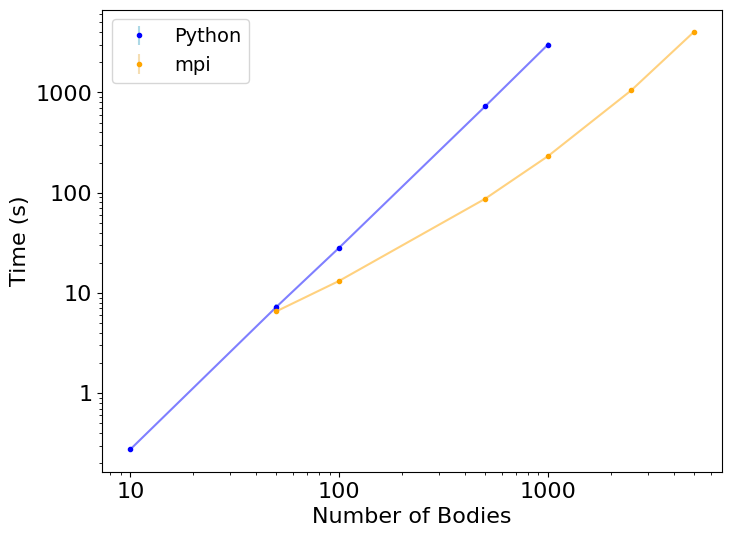

In [41]:
# xticks = [x for x in range(0, 30, 2)]


fig, ax = plt.subplots(1,figsize=(8,6))

#plt.errorbar(threads_plot, guided_efficiency, guided_error, fmt='.', color='Black', ecolor='LightGrey')
ax.errorbar(python_bodies_plot, python_execution_time_avg, python_error, fmt=".",label="Python", color="blue", ecolor="lightblue")
ax.plot(python_bodies_plot, python_execution_time_avg, color="blue", alpha=0.5)

#CYTHON

ax.errorbar(mpi_bodies_plot, mpi_execution_time_avg, mpi_error, fmt=".",label="mpi", color="orange", ecolor="wheat")
ax.plot(mpi_bodies_plot, mpi_execution_time_avg, color="orange", alpha=0.5)

#OPENMP

ax.set_xscale('log',base=10) 
ax.set_yscale('log',base=10) 

# plt.xticks(xticks, xticks)

ax.set_xlabel("Number of Bodies", size=16)
ax.set_ylabel("Time (s)", size=16)


# ax2=ax.twinx()
# ax2.plot(mpi_bodies_plot, mpi_efficiency,  linestyle="--", color="green")



ax.tick_params(which='minor', length=2.5)

ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))



# ax2.set_ylabel("Efficiency", size=16)
# ax2.yaxis.set_tick_params(labelsize=16)

# ax2.yaxis.set_minor_locator(ticker.AutoMinorLocator())

ax.legend(prop={'size': 14})
plt.show()